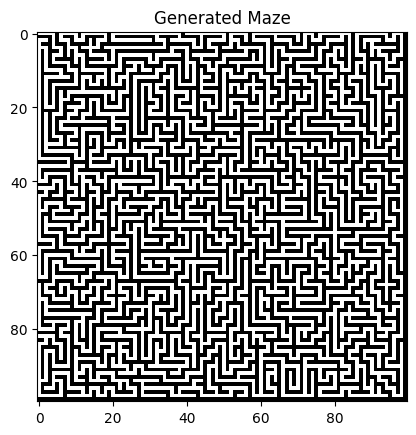

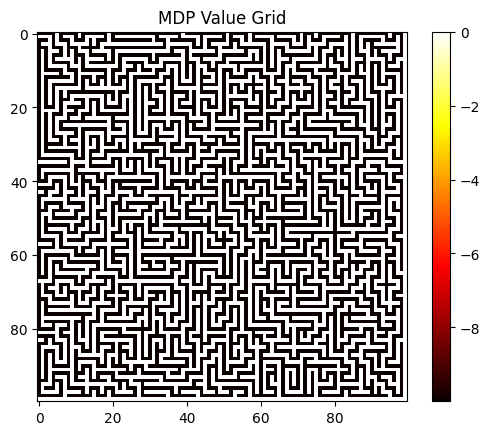

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Initialize the maze
size = 100
Maze = [[1 for _ in range(size)] for _ in range(size)]

# Maze generation with DFS
def DFS_maze_generation(Maze, x, y, size):
    directions = [(0, 2), (2, 0), (0, -2), (-2, 0)]
    random.shuffle(directions)

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < size and 0 <= ny < size and Maze[nx][ny] == 1:
            Maze[x + dx // 2][y + dy // 2] = 0
            Maze[nx][ny] = 0
            DFS_maze_generation(Maze, nx, ny, size)

def create_maze_with_obstacles(Maze, size):
    start = (0, 0)
    Maze[start[0]][start[1]] = 0
    DFS_maze_generation(Maze, start[0], start[1], size)
    return Maze

maze = np.array(create_maze_with_obstacles(Maze, size))
plt.imshow(1 - maze, cmap='gray')
plt.title("Generated Maze")
plt.show()

# MDP-based Dynamic Programming Solver
class MDP:
    def __init__(self, maze, gamma=0.9):
        self.V = np.zeros(maze.shape)
        self.gamma = gamma
        self.maze = maze
        self.goal = (maze.shape[0] - 1, maze.shape[1] - 1)
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def reward(self, pos):
        if pos == self.goal:
            return 100
        elif self.maze[pos] == 1:
            return -10
        return -1

    def value_iteration(self, threshold=0.01):
        while True:
            delta = 0
            for x in range(self.V.shape[0]):
                for y in range(self.V.shape[1]):
                    if self.maze[x, y] == 1:  # Skip obstacles
                        continue
                    old_value = self.V[x, y]
                    values = []
                    for dx, dy in self.directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < size and 0 <= ny < size:
                            values.append(self.reward((nx, ny)) + self.gamma * self.V[nx, ny])
                    self.V[x, y] = max(values) if values else old_value
                    delta = max(delta, abs(old_value - self.V[x, y]))
            if delta < threshold:
                break

    def get_values(self):
        return self.V

# Run MDP
mdp_solver = MDP(maze)
mdp_solver.value_iteration()
mdp_values = mdp_solver.get_values()

plt.imshow(mdp_values, cmap='hot')
plt.title("MDP Value Grid")
plt.colorbar()
plt.show()

# Q-Learning
class QLearning:
    def __init__(self, maze, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
        self.maze = maze
        self.Q = np.zeros((*maze.shape, 4))
        self.goal = (maze.shape[0] - 1, maze.shape[1] - 1)
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def reward(self, pos):
        if pos == self.goal:
            return 100
        elif self.maze[pos] == 1:
            return -10
        return -1

    def choose_action(self, pos):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(range(4))
        else:
            return np.argmax(self.Q[pos[0], pos[1]])

    def update_q_value(self, pos, action, reward, next_pos):
        best_next_action = np.argmax(self.Q[next_pos[0], next_pos[1]])
        td_target = reward + self.gamma * self.Q[next_pos[0], next_pos[1], best_next_action]
        self.Q[pos[0], pos[1], action] += self.alpha * (td_target - self.Q[pos[0], pos[1], action])

    def train(self):
        for _ in range(self.episodes):
            pos = (0, 0)
            while pos != self.goal:
                action = self.choose_action(pos)
                direction = self.directions[action]
                next_pos = (pos[0] + direction[0], pos[1] + direction[1])

                if 0 <= next_pos[0] < size and 0 <= next_pos[1] < size:
                    reward = self.reward(next_pos)
                    self.update_q_value(pos, action, reward, next_pos)
                    pos = next_pos if self.maze[next_pos] == 0 else pos
                else:
                    self.update_q_value(pos, action, -10, pos)
        return self.Q

# Run Q-Learning
q_learning_solver = QLearning(maze)
Q_table = q_learning_solver.train()
avg_q_values = Q_table.mean(axis=2)

plt.imshow(avg_q_values, cmap='hot')
plt.title("Q-Learning Value Grid")
plt.colorbar()
plt.show()

# Comparison of results
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
axis[0].imshow(1 - maze, cmap='gray')
axis[0].set_title("Maze")
axis[1].imshow(mdp_values, cmap='hot')
axis[1].set_title("MDP Value Grid")
axis[2].imshow(avg_q_values, cmap='hot')
axis[2].set_title("Q-Learning Value Grid")
plt.show()
